# Expectation Maximization
#### Description
Here we assume a Gaussian Mixture Model (GMM) to represent the distribution of our data, and use the expectation maximization algorithm to find maximum likelihood estimates of the parameters for the Gaussians that model our data.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io, scipy.stats

NUM_CLUSTERS = 2
NUM_VARIABLES = 2
NUM_ITER = 37

# Initial Conditions and Iteration

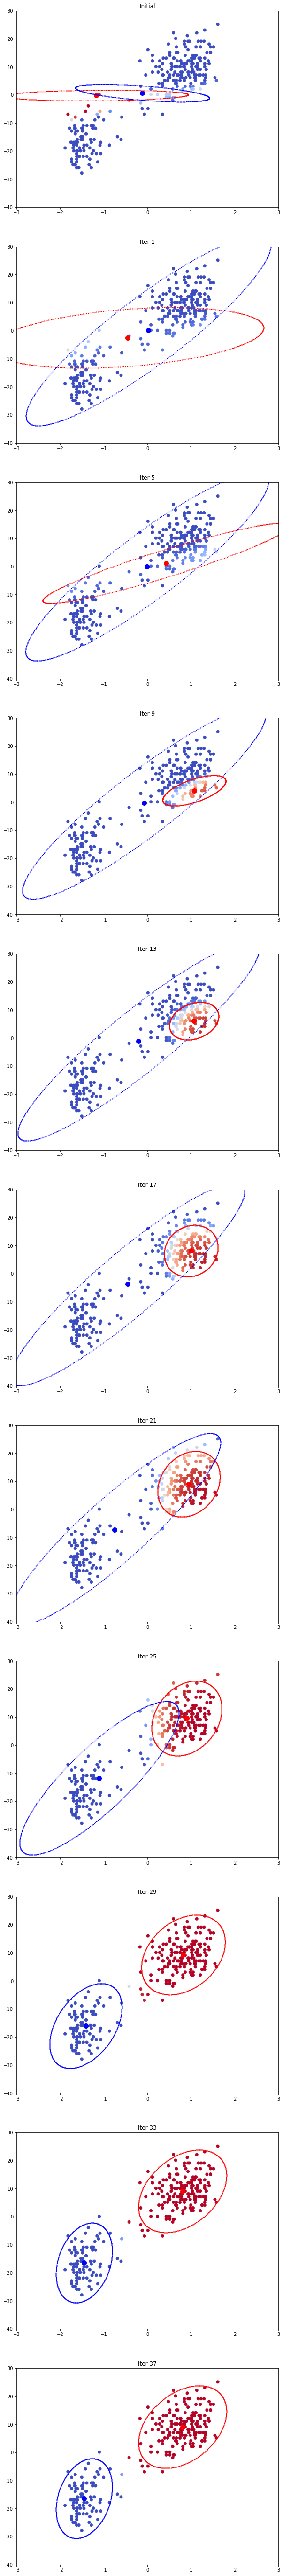

In [0]:
# the Gaussian means (as column vectors -- ie, the mean for Gaussian 0 is mus[:,0]
mus = np.asarray( [[-1.17288986, -0.11642103],
                   [-0.16526981,  0.70142713]])

# the Gaussian covariance matrices
covs = list()
covs.append( 
    np.asarray([[ 0.74072815,  0.09252716],
                [ 0.09252716,  0.5966275 ]]) )
covs.append( 
    np.asarray([[ 0.39312776, -0.46488887],
                [-0.46488887,  1.64990767]]) )
 
# The Gaussian mixing weights
mws = [ 0.68618439, 0.31381561 ]  # called alpha in the slides

#Load data and center the mean at zero
oldf_data = scipy.io.loadmat('old_faithful.mat')
oldf_data = oldf_data['data']
oldf_data = oldf_data - [np.mean(oldf_data[:, 0]), np.mean(oldf_data[:, 1])]

#Define a function to create ellipses based on covariance matrix
NUM_POINTS = 500
def cov_to_pts( cov ):
    circ = np.linspace( 0, 2*np.pi, NUM_POINTS )
    sf = np.asarray( [ np.cos( circ ), np.sin( circ ) ] )
    [u,s,v] = np.linalg.svd( cov )
    pmat = u*2.447*np.sqrt(s) # 95% confidence
    return np.dot(  pmat, sf )

#Define Covariance Ellipses, centering them at Mu
covariances = np.zeros((NUM_CLUSTERS, NUM_VARIABLES, NUM_POINTS))
for k in range(NUM_CLUSTERS):
    covariances[k, :, :] = cov_to_pts(covs[k]) + mus[:, k].reshape(2, 1)

#Give Points Weights based on mean, covariance, and mixing weights for initial clusters
responsibilities = np.zeros((len(oldf_data), NUM_CLUSTERS))
for k in range(NUM_CLUSTERS):
        responsibilities[:, k] = scipy.stats.multivariate_normal.pdf(oldf_data, mean=mus[:,k], cov=covs[k])*mws[k]

responsibilities = responsibilities / responsibilities.sum(axis=1).reshape(len(oldf_data), 1)
colors = plt.cm.coolwarm(responsibilities[:,0])

#Plot Data Points
f, axarr = plt.subplots(nrows=11, ncols=1, figsize=(10, 100))
axarr[0].scatter(oldf_data[:,0], oldf_data[:,1], c=colors)
axarr[0].set_ylim([-40,30])
axarr[0].set_xlim([-3,3])
axarr[0].set_title("Initial")

#Plot cluster means
rb = np.array(["Red", "Blue"])
axarr[0].scatter(mus[0,0], mus[1,0], s=100, c=rb[0])
axarr[0].scatter(mus[0,1], mus[1,1], s=100, c=rb[1])

#Plot covariance ellipses for each cluster
for k in range(NUM_CLUSTERS):
    axarr[0].scatter(covariances[k,0,:], covariances[k,1,:], s=1, c=rb[k])

#ITERATE
for j in range(NUM_ITER):
        
    #Update the mixing weights
    mws = responsibilities.sum(axis=0) / len(oldf_data)
    
    #Update the covariances matrices
    for k in range(NUM_CLUSTERS):
        covs[k] = np.dot(np.transpose((responsibilities[:,k].reshape(272,1)) * (oldf_data - mus[:, k].reshape(1, 2))), (oldf_data - mus[:, k].reshape(1, 2)))/((responsibilities[:,k].sum()))
        
    #Update mus
    for k in range(NUM_CLUSTERS):
        mus[:,k] = (responsibilities[:,k].reshape(272,1) * oldf_data).sum(axis=0) / responsibilities[:,k].sum()
        
    #Update Covariance Ellipses, centering them at Mu
    covariances = np.zeros((NUM_CLUSTERS, NUM_VARIABLES, NUM_POINTS))
    for k in range(NUM_CLUSTERS):
        covariances[k, :, :] = cov_to_pts(covs[k]) + mus[:, k].reshape(2, 1)
        
    #Update responsibilities for each point
    for k in range(NUM_CLUSTERS):
        responsibilities[:, k] = scipy.stats.multivariate_normal.pdf(oldf_data, mean=mus[:,k], cov=covs[k])*mws[k]
    responsibilities = responsibilities / responsibilities.sum(axis=1).reshape(len(oldf_data), 1)
    colors = plt.cm.coolwarm(responsibilities[:,0])
        
    #Plot every fourth iteration
    if (j % 4 == 0):
        index = int(j/4 + .5) + 1
        #Plot Data Points
        axarr[index].scatter(oldf_data[:,0], oldf_data[:,1], c=colors)
        axarr[index].set_ylim([-40,30])
        axarr[index].set_xlim([-3,3])
        title = "Iter " + str(j + 1)
        axarr[index].set_title(title)
        #Plot covariance ellipses for each cluster
        for k in range(NUM_CLUSTERS):
            axarr[index].scatter(covariances[k,0,:], covariances[k,1,:], s=1, c=rb[k])
            #Plot cluster means
            axarr[index].scatter(mus[0,k], mus[1,k], s=100, c=rb[k])       
        
plt.show()